In [ ]:
#드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%matplotlib inline

import time
import os

os.environ['KMP_WARNINGS'] = 'off'
from functools import reduce
import matplotlib as mpl
from datetime import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')

In [ ]:
data4= pd.read_csv("/content/drive/MyDrive/교내공모전/교내통계경진대회_데이터셋 - 2022년 출근 (상선,내선).csv")
data4

,호선명,지하철역,위도,경도,상세주소,총층수,출근_상내선_배차간격,승차인원_1718,승차인원_1819,승차인원_1920,하차인원_1718,하차인원_1819,하차인원_1920,환승유입인원수,"안전시설지수(승강장연결,스크린도어,안전발판)",열차내 사고,역구내 사고,출입문관련,승강설비관련,발빠짐,기타,총사고발생수,반경 내 학교 수,반경 내 주요공원 수,반경 내 대학 수,반경 아파트 수,반경 내 대학교 수,공공 자전거 시설 수,"출근시간 혼잡도 평균(상선,내선)",출근출발_EE,출근출발_EH,출근출발_EW,출근출발_HE,출근출발_HH,출근출발_HW,출근출발_WE,출근출발_WH,출근출발_WW,출근도착_EE,출근도착_EH,출근도착_EW,출근도착_HE,출근도착_HH,출근도착_HW,출근도착_WE,출근도착_WH,출근도착_WW
0,2,강남,37.497175,127.027926,서울서초구서초동1374,3,4.551724,36176,60473,49096,138873,293325,300163,831737,3,1,0,3,1,0,0,5,5,0,1,6,1,4,31.771429,10361,4710,9107,24991,2311,88696,5548,4832,7179,10609,3252,10650,56430,3076,325838,5635,1869,7809
1,2,강변,37.535095,127.094681,서울광진구구의동546-6,2,4.581897,73477,107711,77201,24293,44236,37692,315530,3,0,0,1,1,0,0,2,9,0,0,7,0,5,45.414286,5982,2482,3188,31376,2316,122460,3358,1803,3298,5666,4870,3286,26163,2205,88296,2151,2753,2462
2,2,건대입구,37.540693,127.070230,서울광진구화양동6-4,5,4.600877,49601,88230,59238,24521,59571,49529,374321,3,5,0,3,2,0,0,10,11,1,2,2,2,6,36.428571,7219,5918,5182,29428,2599,130241,1890,3677,2820,8496,4361,3405,52120,2705,98437,3539,2361,2936
3,2,교대,37.493415,127.014080,서울서초구서초동1672-9,3,4.500000,24068,34642,28511,52910,146658,134416,367316,2,3,0,2,1,2,0,8,6,0,2,4,2,2,31.142857,7436,3619,5763,29890,2654,95422,4083,3046,5008,7607,3959,6571,38890,2009,186677,4045,1936,4732
4,2,구로디지털단지,37.485266,126.901401,서울구로구구로동810-3,3,4.565217,127585,174194,106382,79227,234611,136484,731249,3,1,0,2,0,4,0,7,10,1,0,8,0,6,46.157143,6598,3424,4953,24096,1788,95008,3212,2718,2629,7243,3245,10008,42617,2646,416612,3425,1962,5980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,8,석촌,37.505431,127.106979,서울송파구석촌동209,2,7.088652,15060,22456,12895,8127,20617,16697,151930,2,1,0,0,0,0,0,1,7,1,0,1,0,7,68.928571,6214,3713,3134,31529,2048,128764,2406,1919,2634,5297,4340,3308,25198,2455,72462,2433,3025,2721
235,8,송파,37.499703,127.112183,서울송파구가락동459-4,2,7.085106,25174,30969,17856,9419,16947,9960,145566,2,1,0,0,0,0,0,1,10,1,0,3,0,4,78.857143,9665,6101,11644,29754,3020,110184,3088,2696,5248,6246,3456,2630,26233,2126,58383,3221,2245,3038
236,8,잠실,37.513950,127.102234,서울송파구신천동8,3,7.239130,8366,12291,9101,28878,72523,41636,226010,2,0,0,0,0,0,0,0,6,1,0,6,0,8,27.142857,6598,5279,5786,19553,1503,66961,2922,4182,3895,10321,2789,7568,64675,2496,291016,4404,1419,6138
237,8,장지,37.478703,127.126191,서울송파구장지동217-3,2,7.166667,43484,53790,30101,26555,46093,29246,295459,2,0,0,0,1,0,0,1,6,2,0,9,0,12,79.757143,10555,5531,8209,22715,3054,101045,8794,4938,9195,9839,3487,11040,50901,2752,338478,5017,2166,7425


# 상선 내선 출근 노선:2,5,6,7

In [ ]:
data4 = data4[data4['호선명'].isin([2, 5, 6, 7])]
len(data4)

171

In [ ]:
columns_to_remove = ['열차내 사고', '역구내 사고', '출입문관련', '승강설비관련', '발빠짐', '기타']
data4 = data4.drop(columns=columns_to_remove)
data4[data4.isnull().any(axis=1)]

,호선명,지하철역,위도,경도,상세주소,총층수,출근_상내선_배차간격,승차인원_1718,승차인원_1819,승차인원_1920,하차인원_1718,하차인원_1819,하차인원_1920,환승유입인원수,"안전시설지수(승강장연결,스크린도어,안전발판)",총사고발생수,반경 내 학교 수,반경 내 주요공원 수,반경 내 대학 수,반경 아파트 수,반경 내 대학교 수,공공 자전거 시설 수,"출근시간 혼잡도 평균(상선,내선)",출근출발_EE,출근출발_EH,출근출발_EW,출근출발_HE,출근출발_HH,출근출발_HW,출근출발_WE,출근출발_WH,출근출발_WW,출근도착_EE,출근도착_EH,출근도착_EW,출근도착_HE,출근도착_HH,출근도착_HW,출근도착_WE,출근도착_WH,출근도착_WW


# OLS 학습 후 다중공선성 확인

In [ ]:
import pandas as pd
import numpy as np

from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
df1 = data4.copy()

In [ ]:
columns_to_remove = ['호선명', '지하철역', '위도', '경도', '상세주소']
df1 = df1.drop(columns=columns_to_remove)

In [ ]:
import re

def modify_column_names(df):
    new_columns = []
    for column in df.columns:
        modified_name = re.sub(r'\([^)]*\)', '', column)
        modified_name = modified_name.replace('-', '_')
        modified_name = modified_name.replace(' ', '_')
        new_columns.append(modified_name)

    return new_columns

df1.columns = modify_column_names(df1)
df1

,총층수,출근_상내선_배차간격,승차인원_1718,승차인원_1819,승차인원_1920,하차인원_1718,하차인원_1819,하차인원_1920,환승유입인원수,안전시설지수,총사고발생수,반경_내_학교_수,반경_내_주요공원_수,반경_내_대학_수,반경_아파트_수,반경_내_대학교_수,공공_자전거_시설_수,출근시간_혼잡도_평균,출근출발_EE,출근출발_EH,출근출발_EW,출근출발_HE,출근출발_HH,출근출발_HW,출근출발_WE,출근출발_WH,출근출발_WW,출근도착_EE,출근도착_EH,출근도착_EW,출근도착_HE,출근도착_HH,출근도착_HW,출근도착_WE,출근도착_WH,출근도착_WW
0,3,4.551724,36176,60473,49096,138873,293325,300163,831737,3,5,5,0,1,6,1,4,31.771429,10361,4710,9107,24991,2311,88696,5548,4832,7179,10609,3252,10650,56430,3076,325838,5635,1869,7809
1,2,4.581897,73477,107711,77201,24293,44236,37692,315530,3,2,9,0,0,7,0,5,45.414286,5982,2482,3188,31376,2316,122460,3358,1803,3298,5666,4870,3286,26163,2205,88296,2151,2753,2462
2,5,4.600877,49601,88230,59238,24521,59571,49529,374321,3,10,11,1,2,2,2,6,36.428571,7219,5918,5182,29428,2599,130241,1890,3677,2820,8496,4361,3405,52120,2705,98437,3539,2361,2936
3,3,4.500000,24068,34642,28511,52910,146658,134416,367316,2,8,6,0,2,4,2,2,31.142857,7436,3619,5763,29890,2654,95422,4083,3046,5008,7607,3959,6571,38890,2009,186677,4045,1936,4732
4,3,4.565217,127585,174194,106382,79227,234611,136484,731249,3,7,10,1,0,8,0,6,46.157143,6598,3424,4953,24096,1788,95008,3212,2718,2629,7243,3245,10008,42617,2646,416612,3425,1962,5980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,2,4.693694,49584,56691,30165,8510,14297,8090,147598,3,2,8,2,1,5,1,5,77.542857,5395,2215,4476,41350,1118,177399,3477,1681,3573,3635,3364,2572,18426,1316,45777,1778,3482,1527
225,4,4.817352,10121,13956,12092,56021,144360,95665,244815,2,2,8,2,0,10,0,6,29.214286,9342,4789,8591,14222,1325,44536,4729,4209,5446,17098,2616,13111,81903,1431,417692,7768,1178,8045
226,4,5.029412,21160,25902,17208,7942,17922,12770,95405,3,0,8,1,2,11,2,7,23.385714,7266,5213,3963,42997,2288,153883,3391,2755,3132,6531,4978,3013,36556,2178,72852,2861,4220,2697
227,3,5.144928,65969,68384,37897,14751,24644,19419,246439,3,4,20,1,2,10,2,7,20.328571,2298,1434,837,18891,1304,67804,828,766,1110,1581,2225,602,7177,906,13528,552,1456,572


In [ ]:
text_join1 = ' + '.join(df1.columns)
text_join1

'총층수 + 출근_상내선_배차간격 + 승차인원_1718 + 승차인원_1819 + 승차인원_1920 + 하차인원_1718 + 하차인원_1819 + 하차인원_1920 + 환승유입인원수 + 안전시설지수 + 총사고발생수 + 반경_내_학교_수 + 반경_내_주요공원_수 + 반경_내_대학_수 + 반경_아파트_수 + 반경_내_대학교_수 + 공공_자전거_시설_수 + 출근시간_혼잡도_평균 + 출근출발_EE + 출근출발_EH + 출근출발_EW + 출근출발_HE + 출근출발_HH + 출근출발_HW + 출근출발_WE + 출근출발_WH + 출근출발_WW + 출근도착_EE + 출근도착_EH + 출근도착_EW + 출근도착_HE + 출근도착_HH + 출근도착_HW + 출근도착_WE + 출근도착_WH + 출근도착_WW'

In [ ]:
print(df1.columns)

Index(['총층수', '출근_상내선_배차간격', '승차인원_1718', '승차인원_1819', '승차인원_1920',
       '하차인원_1718', '하차인원_1819', '하차인원_1920', '환승유입인원수', '안전시설지수', '총사고발생수',
       '반경_내_학교_수', '반경_내_주요공원_수', '반경_내_대학_수', '반경_아파트_수', '반경_내_대학교_수',
       '공공_자전거_시설_수', '출근시간_혼잡도_평균', '출근출발_EE', '출근출발_EH', '출근출발_EW',
       '출근출발_HE', '출근출발_HH', '출근출발_HW', '출근출발_WE', '출근출발_WH', '출근출발_WW',
       '출근도착_EE', '출근도착_EH', '출근도착_EW', '출근도착_HE', '출근도착_HH', '출근도착_HW',
       '출근도착_WE', '출근도착_WH', '출근도착_WW'],
      dtype='object')


In [ ]:
def standardize_var(x):
    mean = np.mean(x)
    std = np.sqrt(np.sum(np.square(x-mean))/(len(x)-1))
    return ((x-mean)/std)/np.sqrt(len(x)-1)

sdf = df1.apply(standardize_var) ## 데이터 표준화
sdf_X = sdf[['총층수', '출근_상내선_배차간격', '승차인원_1718', '승차인원_1819', '승차인원_1920',
       '하차인원_1718', '하차인원_1819', '하차인원_1920', '환승유입인원수', '안전시설지수', '총사고발생수',
       '반경_내_학교_수', '반경_내_주요공원_수', '반경_내_대학_수', '반경_아파트_수', '반경_내_대학교_수',
       '공공_자전거_시설_수', '출근출발_EE', '출근출발_EH', '출근출발_EW',
       '출근출발_HE', '출근출발_HH', '출근출발_HW', '출근출발_WE', '출근출발_WH', '출근출발_WW',
       '출근도착_EE', '출근도착_EH', '출근도착_EW', '출근도착_HE', '출근도착_HH', '출근도착_HW',
       '출근도착_WE', '출근도착_WH', '출근도착_WW']]
corr = np.array(sdf_X.corr()) ## 상관계수 행렬
corr_inv = np.linalg.inv(corr) ## 상관계수행렬의 역행렬

## standardized된 변수들로 이루어진 선형 회귀모형은 절편항이 없다.
## 따라서 절편항은 제외한다. 포함시켜도 절편항이 0에 가까운 값으로 추정된다.
fit = ols('출근시간_혼잡도_평균 ~총층수 + 출근_상내선_배차간격 + 승차인원_1718 + 승차인원_1819 + 승차인원_1920 + 하차인원_1718 + 하차인원_1819 + 하차인원_1920 + 환승유입인원수 + 안전시설지수 + 총사고발생수 + 반경_내_학교_수 + 반경_내_주요공원_수 + 반경_내_대학_수 + 반경_아파트_수 + 반경_내_대학교_수 + 공공_자전거_시설_수 + 출근출발_EE + 출근출발_EH + 출근출발_EW + 출근출발_HE + 출근출발_HH + 출근출발_HW + 출근출발_WE + 출근출발_WH + 출근출발_WW + 출근도착_EE + 출근도착_EH + 출근도착_EW + 출근도착_HE + 출근도착_HH + 출근도착_HW + 출근도착_WE + 출근도착_WH + 출근도착_WW',data=sdf).fit()

variables = [] ## 변수 이름
reg_coef = [] ## 해당 변수의 회귀 계수
vif = [] ## 해당 변수의 분산팽창인자
for i in range(len(sdf_X.columns)):
    col_name = sdf_X.columns[i]
    variables.append(col_name)
    reg_coef.append(fit.params[col_name])
    vif.append(corr_inv[i][i])

df_res = pd.DataFrame()
df_res['Variable'] = variables
df_res['Estimate'] = reg_coef
df_res['VIF'] = vif

In [ ]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            출근시간_혼잡도_평균   R-squared:                       0.274
Model:                            OLS   Adj. R-squared:                  0.086
Method:                 Least Squares   F-statistic:                     1.458
Date:                Sat, 11 Nov 2023   Prob (F-statistic):             0.0663
Time:                        04:55:28   Log-Likelihood:                 224.39
No. Observations:                 171   AIC:                            -376.8
Df Residuals:                     135   BIC:                            -263.7
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.711e-17      0.006  -4.83e-15      1.000      -0.011       0.011
총층수             0.0057      0.089      0.063      0.950      -0.171       0.183
출근_상내선_배차간격    -0.1155      0.100     -1.155      0.250      -0.313       0.082
승차인원_1718      -0.1061      0.464     -0.229      0.820      -1.024       0.812
승차인원_1819      -0.3960      0.818     -0.484      0.629      -2.013       1.221
승차인원_1920       0.3352      0.571      0.587      0.558      -0.794       1.464
하차인원_1718      -0.2128      0.369     -0.577      0.565      -0.943       0.517
하차인원_1819       0.4340      0.393      1.105      0.271      -0.343       1.211
하차인원_1920      -0.4963      0.362     -1.372      0.172      -1.212       0.219
환승유입인원수         0.2671      0.284      0.939      0.349      -0.295       0.830
안전시설지수         -0.0377      0.089     -0.425      0.671      -0.213       0.138
총사고발생수          0.0807      0.098      0.819      0.414      -0.114       0.275
반경_내_학교_수      -0.0050      0.100     -0.050      0.960      -0.202       0.192
반경_내_주요공원_수     0.2014      0.098      2.054      0.042       0.007       0.395
반경_내_대학_수      -1.4624      1.527     -0.958      0.340      -4.482       1.558
반경_아파트_수       -0.0401      0.093     -0.432      0.667      -0.224       0.144
반경_내_대학교_수      1.5645      1.528      1.024      0.308      -1.457       4.586
공공_자전거_시설_수    -0.1445      0.104     -1.392      0.166      -0.350       0.061
출근출발_EE        -0.0443      0.518     -0.086      0.932      -1.069       0.980
출근출발_EH         0.1521      0.190      0.803      0.424      -0.223       0.527
출근출발_EW        -0.4764      0.401     -1.189      0.236      -1.269       0.316
출근출발_HE        -0.2898      0.477     -0.608      0.544      -1.232       0.653
출근출발_HH         0.0320      0.227      0.141      0.888      -0.417       0.481
출근출발_HW        -0.0715      0.352     -0.203      0.840      -0.768       0.625
출근출발_WE         0.1548      0.367      0.422      0.674      -0.572       0.881
출근출발_WH        -0.5032      0.349     -1.442      0.152      -1.194       0.187
출근출발_WW         0.8191      0.336      2.439      0.016       0.155       1.483
출근도착_EE         0.2752      0.518      0.531      0.596      -0.749       1.299
출근도착_EH         0.3877      0.283      1.369      0.173      -0.172       0.948
출근도착_EW        -0.4529      1.327     -0.341      0.733      -3.078       2.172
출근도착_HE        -0.0309      0.533     -0.058      0.954      -1.086       1.024
출근도착_HH         0.4027      0.228      1.765      0.080      -0.048       0.854
출근도착_HW         1.2026      1.167      1.031      0.304      -1.105       3.510
출근도착_WE        -0.4188      0.653     -0.641      0.522      -1.710       0.873
출근도착_WH        -0.1533      0.211     -0.726      0.469      -0.571       0.265
출근도착_WW        -0.7430      0.748     -0.99

=> 다중공선성 문제 有

In [ ]:
df_res

,Variable,Estimate,VIF
0,총층수,0.005674,1.488622
1,출근_상내선_배차간격,-0.115500,1.860466
2,승차인원_1718,-0.106074,40.061069
3,승차인원_1819,-0.395952,124.419685
4,승차인원_1920,0.335209,60.628924
5,하차인원_1718,-0.212839,25.347058
6,하차인원_1819,0.433995,28.720284
7,하차인원_1920,-0.496280,24.336153
8,환승유입인원수,0.267088,15.048994
9,안전시설지수,-0.037742,1.466111


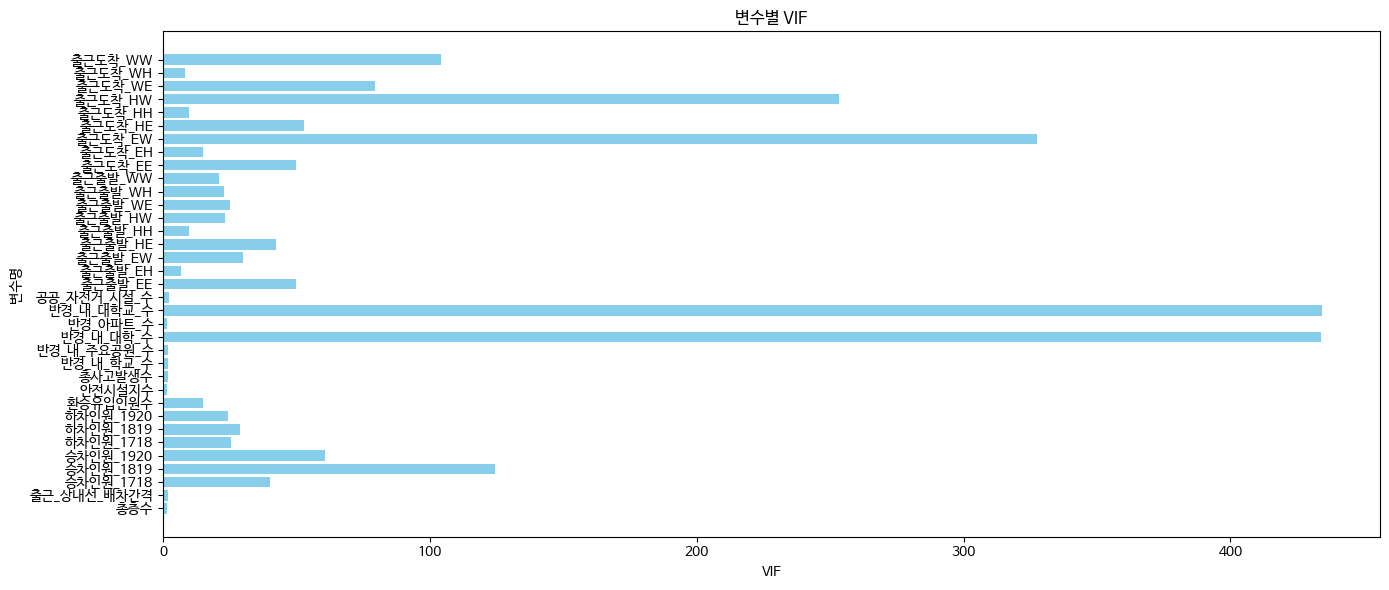

In [ ]:
# 변수명과 VIF 값 추출
variables = df_res['Variable']
vif_values = df_res['VIF']

# 막대 그래프로 변수별 VIF 시각화
plt.figure(figsize=(14, 6))
plt.barh(variables, vif_values, color='skyblue')
plt.xlabel('VIF')
plt.ylabel('변수명')
plt.title('변수별 VIF')
plt.tight_layout()
plt.show()

=> 다중공선성 문제 해결을 위해 변수선택 필요

# 다중공선성이 있기에 변수선택을 진행 [단계별 선택법]

전진 선택에서는 한 번 선택된 특성은 제거되지 않고, 후진 제거에서는 한 번 제거된 특성은 다시 선택되지X

=> 두 방법 모두 더 많은 특성 조합에 대해 모델을 평가할 수 없다는 단점 O

Stepwise selection은 전진 선택과 후진 제거 방식을 매 단계마다 반복하여 적용하는 방식

이전 두 방법보다는 더 오래 걸리지만 최적의 변수 조합을 찾을 확률이 높기에 해당 방식을 선택

In [ ]:
import statsmodels.api as sm

variables = ['총층수', '출근_상내선_배차간격', '승차인원_1718', '승차인원_1819', '승차인원_1920',
       '하차인원_1718', '하차인원_1819', '하차인원_1920', '환승유입인원수', '안전시설지수', '총사고발생수',
       '반경_내_학교_수', '반경_내_주요공원_수', '반경_내_대학_수', '반경_아파트_수', '반경_내_대학교_수',
       '공공_자전거_시설_수', '출근출발_EE', '출근출발_EH', '출근출발_EW',
       '출근출발_HE', '출근출발_HH', '출근출발_HW', '출근출발_WE', '출근출발_WH', '출근출발_WW',
       '출근도착_EE', '출근도착_EH', '출근도착_EW', '출근도착_HE', '출근도착_HH', '출근도착_HW',
       '출근도착_WE', '출근도착_WH', '출근도착_WW']  # 설명 변수 리스트
y = df1['출근시간_혼잡도_평균']  # 반응 변수
selected_variables = []  # 선택된 변수들
sl_enter = 0.1
sl_remove = 0.1
sv_per_step = []  # 각 스텝별로 선택된 변수들
adjusted_r_squared = []  # 각 스텝별 수정된 결정계수
steps = []  # 스텝
step = 0

while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder)  # 변수의 p-value

    # 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 선형 모형을 적합한다.
    for col in remainder:
        X = df1[selected_variables + [col]]
        X = sm.add_constant(X)
        model = sm.OLS(y, X).fit()
        pval[col] = model.pvalues[col]

    min_pval = pval.min()
    if min_pval < sl_enter:  # 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())

        # 선택된 변수들에 대해서 어떤 변수를 제거할지 고른다.
        while len(selected_variables) > 0:
            selected_X = df1[selected_variables]
            selected_X = sm.add_constant(selected_X)
            selected_pval = sm.OLS(y, selected_X).fit().pvalues[1:]  # 절편항의 p-value는 뺀다
            max_pval = selected_pval.max()

            if max_pval >= sl_remove:  # 최대 p-value값이 기준값보다 크거나 같으면 제외
                remove_variable = selected_pval.idxmax()
                selected_variables.remove(remove_variable)
            else:
                break

            step += 1
            steps.append(step)
            adj_r_squared = sm.OLS(y, sm.add_constant(df1[selected_variables])).fit().rsquared_adj
            adjusted_r_squared.append(adj_r_squared)
            sv_per_step.append(selected_variables.copy())
    else:
        break

<ipython-input-64-685f6193a078>:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  # 변수의 p-value
<ipython-input-64-685f6193a078>:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  # 변수의 p-value
<ipython-input-64-685f6193a078>:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  # 변수의 p-value
<ipython-input-64-685f6193a078>:21: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  # 변수의 p-value
<ipython

In [ ]:
selected_variables

['출근도착_HH', '반경_내_주요공원_수', '출근도착_EE', '출근출발_HW', '출근출발_WW', '반경_내_대학교_수']

# 다중공선성이 있기에 변수선택을 진행 [전진 선택법]

In [ ]:
variables =  ['총층수', '출근_상내선_배차간격', '승차인원_1718', '승차인원_1819', '승차인원_1920',
       '하차인원_1718', '하차인원_1819', '하차인원_1920', '환승유입인원수', '안전시설지수', '총사고발생수',
       '반경_내_학교_수', '반경_내_주요공원_수', '반경_내_대학_수', '반경_아파트_수', '반경_내_대학교_수',
       '공공_자전거_시설_수', '출근출발_EE', '출근출발_EH', '출근출발_EW',
       '출근출발_HE', '출근출발_HH', '출근출발_HW', '출근출발_WE', '출근출발_WH', '출근출발_WW',
       '출근도착_EE', '출근도착_EH', '출근도착_EW', '출근도착_HE', '출근도착_HH', '출근도착_HW',
       '출근도착_WE', '출근도착_WH', '출근도착_WW']  # 설명 변수 리스트
y = df1['출근시간_혼잡도_평균']  # 반응 변수
selected_variables = []  # 선택된 변수들
sl_enter = 0.1
sv_per_step = []  # 각 스텝별로 선택된 변수들
adjusted_r_squared = []  # 각 스텝별 수정된 결정계수
steps = []  # 스텝
step = 0

while len(variables) > 0:
    remainder = list(set(variables) - set(selected_variables))
    pval = pd.Series(index=remainder)  # 변수의 p-value

    # 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 선형 모형을 적합한다.
    for col in remainder:
        X = df1[selected_variables + [col]]
        X = sm.add_constant(X)
        model = sm.OLS(y, X).fit()
        pval[col] = model.pvalues[col]

    min_pval = pval.min()

    if min_pval < sl_enter:  # 최소 p-value 값이 기준 값보다 작으면 포함
        selected_variables.append(pval.idxmin())

        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y, sm.add_constant(df1[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

<ipython-input-66-75873528eef8>:18: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  # 변수의 p-value
<ipython-input-66-75873528eef8>:18: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  # 변수의 p-value
<ipython-input-66-75873528eef8>:18: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  # 변수의 p-value
<ipython-input-66-75873528eef8>:18: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pval = pd.Series(index=remainder)  # 변수의 p-value
<ipython

In [ ]:
selected_variables

['출근도착_HH', '반경_내_주요공원_수', '출근도착_EE', '출근출발_HW', '출근출발_WW', '반경_내_대학교_수']

# 다중공선성이 있기에 변수선택을 진행 [후진 제거법]

In [ ]:
## 후진 소거법
variables = ['총층수', '출근_상내선_배차간격', '승차인원_1718', '승차인원_1819', '승차인원_1920',
       '하차인원_1718', '하차인원_1819', '하차인원_1920', '환승유입인원수', '안전시설지수', '총사고발생수',
       '반경_내_학교_수', '반경_내_주요공원_수', '반경_내_대학_수', '반경_아파트_수', '반경_내_대학교_수',
       '공공_자전거_시설_수', '출근출발_EE', '출근출발_EH', '출근출발_EW',
       '출근출발_HE', '출근출발_HH', '출근출발_HW', '출근출발_WE', '출근출발_WH', '출근출발_WW',
       '출근도착_EE', '출근도착_EH', '출근도착_EW', '출근도착_HE', '출근도착_HH', '출근도착_HW',
       '출근도착_WE', '출근도착_WH', '출근도착_WW']  # 설명 변수 리스트

y = df1['출근시간_혼잡도_평균']

selected_variables = variables ## 초기에는 모든 변수가 선택된 상태
sl_remove = 0.1

sv_per_step = [] ## 각 스텝별로 선택된 변수들
adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
steps = [] ## 스텝
step = 0
while len(selected_variables) > 0:
    X = sm.add_constant(df1[selected_variables])
    p_vals = sm.OLS(y,X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
    max_pval = p_vals.max() ## 최대 p-value
    if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
        remove_variable = p_vals.idxmax()
        selected_variables.remove(remove_variable)

        step += 1
        steps.append(step)
        adj_r_squared = sm.OLS(y,sm.add_constant(df1[selected_variables])).fit().rsquared_adj
        adjusted_r_squared.append(adj_r_squared)
        sv_per_step.append(selected_variables.copy())
    else:
        break

In [ ]:
selected_variables

['반경_내_주요공원_수',
 '반경_내_대학교_수',
 '공공_자전거_시설_수',
 '출근출발_EW',
 '출근출발_HE',
 '출근출발_WW',
 '출근도착_HH']

In [ ]:
selected_columns = ['반경_내_주요공원_수','출근시간_혼잡도_평균',
 '반경_내_대학교_수',
 '공공_자전거_시설_수',
 '출근출발_EW',
 '출근출발_HE',
 '출근출발_WW',
 '출근도착_HH']
df2 = df1[selected_columns]
df2

,반경_내_주요공원_수,출근시간_혼잡도_평균,반경_내_대학교_수,공공_자전거_시설_수,출근출발_EW,출근출발_HE,출근출발_WW,출근도착_HH
0,0,31.771429,1,4,9107,24991,7179,3076
1,0,45.414286,0,5,3188,31376,3298,2205
2,1,36.428571,2,6,5182,29428,2820,2705
3,0,31.142857,2,2,5763,29890,5008,2009
4,1,46.157143,0,6,4953,24096,2629,2646
...,...,...,...,...,...,...,...,...
224,2,77.542857,1,5,4476,41350,3573,1316
225,2,29.214286,0,6,8591,14222,5446,1431
226,1,23.385714,2,7,3963,42997,3132,2178
227,1,20.328571,2,7,837,18891,1110,906


# 최적모형 선택

수정결정계수, Mallows' Cp, AIC, BIC, PRESS 기준으로 판단

수정결정계수 -> 높을수록 좋은 모형

Mallows' Cp -> 값이 작을수록 & Cp값이 변수의 개수 p와 가까울수록 좋은 모형

AIC -> 작을수록 좋은 모형

BIC -> 작을수록 좋은 모형

PRESS -> 작을수록 좋은 예측력을 가진 모형

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

from itertools import combinations
from statsmodels.formula.api import ols

In [ ]:
df2.insert(0,'Intercept',[1]*len(df2)) ## 상수항 추가

In [ ]:
df2

,Intercept,반경_내_주요공원_수,출근시간_혼잡도_평균,반경_내_대학교_수,공공_자전거_시설_수,출근출발_EW,출근출발_HE,출근출발_WW,출근도착_HH
0,1,0,31.771429,1,4,9107,24991,7179,3076
1,1,0,45.414286,0,5,3188,31376,3298,2205
2,1,1,36.428571,2,6,5182,29428,2820,2705
3,1,0,31.142857,2,2,5763,29890,5008,2009
4,1,1,46.157143,0,6,4953,24096,2629,2646
...,...,...,...,...,...,...,...,...,...
224,1,2,77.542857,1,5,4476,41350,3573,1316
225,1,2,29.214286,0,6,8591,14222,5446,1431
226,1,1,23.385714,2,7,3963,42997,3132,2178
227,1,1,20.328571,2,7,837,18891,1110,906


In [ ]:
print(df2.columns)

Index(['Intercept', '반경_내_주요공원_수', '출근시간_혼잡도_평균', '반경_내_대학교_수', '공공_자전거_시설_수',
       '출근출발_EW', '출근출발_HE', '출근출발_WW', '출근도착_HH'],
      dtype='object')


In [ ]:
text_join2 = ' + '.join(df2.columns)
text_join2

'Intercept + 반경_내_주요공원_수 + 출근시간_혼잡도_평균 + 반경_내_대학교_수 + 공공_자전거_시설_수 + 출근출발_EW + 출근출발_HE + 출근출발_WW + 출근도착_HH'

In [ ]:
#모델 적합
fit = ols('출근시간_혼잡도_평균~반경_내_주요공원_수 + 반경_내_대학교_수 + 공공_자전거_시설_수 + 출근출발_EW + 출근출발_HE + 출근출발_WW + 출근도착_HH',data=df2).fit()

## hat matrix 계산
X = np.array(df2[['Intercept', '반경_내_주요공원_수', '반경_내_대학교_수', '공공_자전거_시설_수',
       '출근출발_EW', '출근출발_HE', '출근출발_WW', '출근도착_HH']]) ## Model matrix for full model

X_tX = np.matmul(X.transpose(),X)
X_tX_inv = np.linalg.inv(X_tX)
hat_matrix = np.matmul(np.matmul(X,X_tX_inv),X.transpose()) ## hat matrix
diagonals = np.array([hat_matrix[i][i] for i in range(len(df2))]) ## hat matrix의 대각원소

response = '출근시간_혼잡도_평균'
y = df2[response] ## 반응 변수 벡터
variables = ['반경_내_주요공원_수', '반경_내_대학교_수', '공공_자전거_시설_수',
       '출근출발_EW', '출근출발_HE', '출근출발_WW', '출근도착_HH'] ## 총 변수집합

num_var = len(variables) ## 총 변수 개수
num_data = len(df2) ## 데이터 개수
mse_full = fit.mse_resid ## 모든 변수를 포함한 mean square residual
mean_response = np.mean(y) ## y의 평균

cp_list = [] ## Mallow's C
ad_r_list = [] ## 수정된 결정계수
aic_list = [] ## Akaike's information criterion
bic_list = [] ## Bayes information criterion
press_list = [] ## press criterion

num_parameter = [] ## 파라미터 즉 절편을 포함한 회귀계수의 개수
subsets = [] ## 변수의 집합
for p in range(num_var+1):
    if p == 0: ## 절편만 있는 모형
        var_exp = '1'
        exp = response + ' ~ ' + var_exp
        subsets.append('None') ## 절편만 있고 변수는 없음
        sub_fit = ols(exp,data=df2).fit() ## 절편만 있는 모형 적합
        sse = np.sum(np.square(sub_fit.resid)) ## square sum of residual
        sst = np.sum(np.square(y-mean_response)) ## total sum of square
        cp = sse/mse_full - (num_data-2*(p+1)) ## Mallow's C
        ad_r = 0 ## 수정된 결정계수 절편만 있다면 수정된 결정계수 값은 0
        aic = num_data*np.log(sse) - num_data*np.log(num_data) + 2*(p+1) ## Akaike's information criterion
        bic = num_data*np.log(sse) - num_data*np.log(num_data) + np.log(num_data)*(p+1) ## Bayes information criterion
        press = np.sum(np.square(np.divide(sub_fit.resid,1-diagonals))) ## press
        cp_list.append(cp)
        ad_r_list.append(ad_r)
        aic_list.append(aic)
        bic_list.append(bic)
        press_list.append(press)
        num_parameter.append(p+1)
    else:
        selected_var = combinations(variables,p)
        for s in selected_var:
            var_exp = '+'.join(s)
            exp = response + ' ~ ' + var_exp
            subsets.append(', '.join(s))
            sub_fit = ols(exp,data=df2).fit()
            sse = np.sum(np.square(sub_fit.resid))
            sst = np.sum(np.square(y-np.mean(y)))
            cp = sse/mse_full - (num_data-2*(p+1))
            ad_r = 1 - ((num_data-1)/(num_data-p-1))*(sse/sst)
            aic = num_data*np.log(sse) - num_data*np.log(num_data) + 2*(p+1)
            bic = num_data*np.log(sse) - num_data*np.log(num_data) + np.log(num_data)*(p+1)
            press = np.sum(np.square(np.divide(sub_fit.resid,1-diagonals)))
            cp_list.append(cp)
            ad_r_list.append(ad_r)
            aic_list.append(aic)
            bic_list.append(bic)
            press_list.append(press)
            num_parameter.append(p+1)

df2_res = pd.DataFrame()
df2_res['Variables'] = subsets
df2_res['Number_of_parameter'] = num_parameter
df2_res['Ad_R'] = ad_r_list
df2_res['Cp'] = cp_list
df2_res['AIC'] = aic_list
df2_res['BIC'] = bic_list
df2_res['PRESS'] = press_list

In [ ]:
df2_res

,Variables,Number_of_parameter,Ad_R,Cp,AIC,BIC,PRESS
0,None,1,0.000000,30.826851,1053.272405,1056.414068,88528.364598
1,반경_내_주요공원_수,2,0.024510,26.782510,1050.020174,1056.303501,85807.882090
2,반경_내_대학교_수,2,0.028189,26.051605,1049.373980,1055.657307,85508.574446
3,공공_자전거_시설_수,2,0.003030,31.049409,1053.744570,1060.027897,87721.744227
4,출근출발_EW,2,-0.004321,32.509839,1055.000909,1061.284236,88468.788498
...,...,...,...,...,...,...,...
123,"반경_내_주요공원_수, 반경_내_대학교_수, 공공_자전거_시설_수, 출근출발_HE,...",7,0.121241,12.401968,1037.027164,1059.018809,74658.008489
124,"반경_내_주요공원_수, 반경_내_대학교_수, 출근출발_EW, 출근출발_HE, 출근출...",7,0.134148,9.913943,1034.497042,1056.488687,72987.958905
125,"반경_내_주요공원_수, 공공_자전거_시설_수, 출근출발_EW, 출근출발_HE, 출근...",7,0.126069,11.471308,1036.085134,1058.076779,73758.634907
126,"반경_내_대학교_수, 공공_자전거_시설_수, 출근출발_EW, 출근출발_HE, 출근출...",7,0.126822,11.326208,1035.937793,1057.929438,73775.560802


In [ ]:
# Ad_R, Cp, AIC, BIC, PRESS 지표에 대한 최적모델
best_models = {
    'Ad_R': df2_res[df2_res['Ad_R'] == df2_res['Ad_R'].max()],
    'Cp': df2_res[df2_res['Cp'] == df2_res['Cp'].min()],
    'AIC': df2_res[df2_res['AIC'] == df2_res['AIC'].min()],
    'BIC': df2_res[df2_res['BIC'] == df2_res['BIC'].min()],
    'PRESS': df2_res[df2_res['PRESS'] == df2_res['PRESS'].min()]
}

best_models_df = pd.DataFrame()
for metric, best_model in best_models.items():
    best_models_df = best_models_df.append(best_model)

best_models_df

<ipython-input-96-b1b3f5dfd088>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_models_df = best_models_df.append(best_model)
<ipython-input-96-b1b3f5dfd088>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_models_df = best_models_df.append(best_model)
<ipython-input-96-b1b3f5dfd088>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_models_df = best_models_df.append(best_model)
<ipython-input-96-b1b3f5dfd088>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  best_models_df = best_models_df.append(best_model)
<ipython-input-96-b1b3f5dfd088>:12: FutureWarning: The frame.append method is deprecated and will be removed fro

,Variables,Number_of_parameter,Ad_R,Cp,AIC,BIC,PRESS
127,"반경_내_주요공원_수, 반경_내_대학교_수, 공공_자전거_시설_수, 출근출발_EW,...",8,0.149263,8.000000,1032.439526,1057.572834,71175.855651
127,"반경_내_주요공원_수, 반경_내_대학교_수, 공공_자전거_시설_수, 출근출발_EW,...",8,0.149263,8.000000,1032.439526,1057.572834,71175.855651
127,"반경_내_주요공원_수, 반경_내_대학교_수, 공공_자전거_시설_수, 출근출발_EW,...",8,0.149263,8.000000,1032.439526,1057.572834,71175.855651
13,"반경_내_주요공원_수, 출근도착_HH",3,0.076799,17.309926,1041.584331,1051.009322,80467.935099
127,"반경_내_주요공원_수, 반경_내_대학교_수, 공공_자전거_시설_수, 출근출발_EW,...",8,0.149263,8.000000,1032.439526,1057.572834,71175.855651


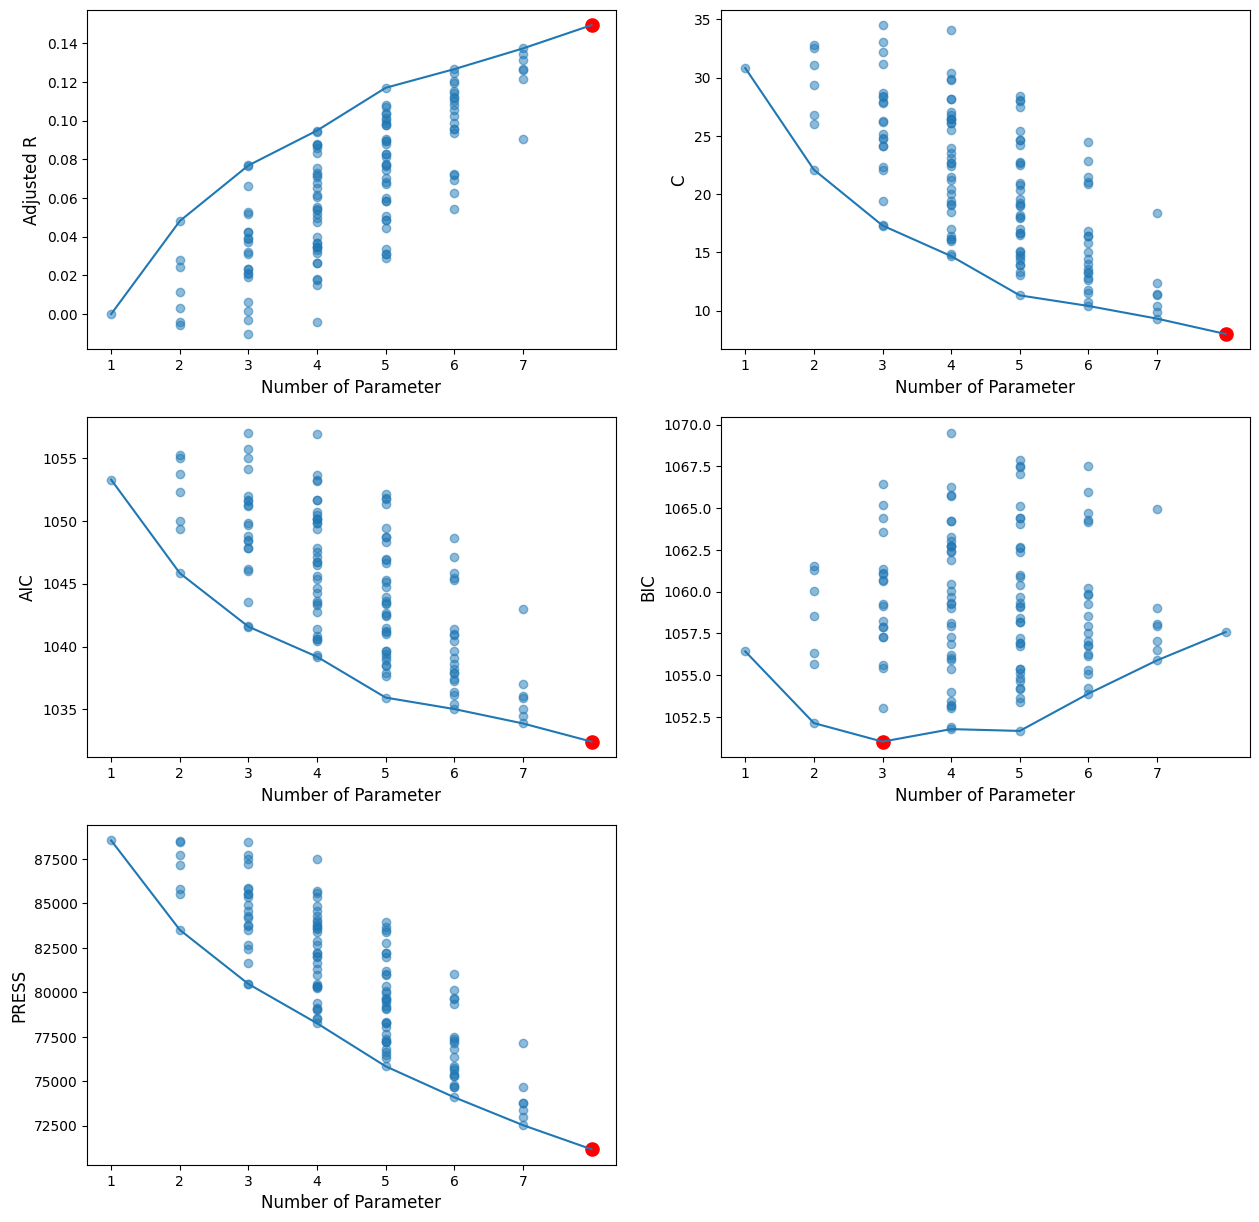

In [ ]:
fig = plt.figure(figsize=(15,15))
fig.set_facecolor('white')
font_size = 12
columns = ['Ad_R', 'Cp', 'AIC', 'BIC', 'PRESS']
xlabel = 'Number of Parameter'
ylabels = ['Adjusted R','C','AIC','BIC','PRESS']

marker_style = dict(color='red',marker='o',markersize=10)

for i in range(len(ylabels)):
    ind = 320+i+1
    plt.subplot(ind)
    plt.scatter(df2_res['Number_of_parameter'],df2_res[columns[i]],alpha=0.5)
    plt.xlabel(xlabel,fontsize=font_size)
    plt.ylabel(ylabels[i],fontsize=font_size)
    if ylabels[i] == 'Adjusted R':
        temp_df2 = df2_res.groupby('Number_of_parameter',as_index=False)[columns[i]].max()
        idx = temp_df2[columns[i]].idxmax()
        max_val = temp_df2[columns[i]].max()
        plt.scatter(temp_df2['Number_of_parameter'][idx], max_val,s=90,color='red')
        plt.plot(temp_df2['Number_of_parameter'],temp_df2[columns[i]])
    else:
        temp_df2 = df2_res.groupby('Number_of_parameter',as_index=False)[columns[i]].min()
        idx = temp_df2[columns[i]].idxmin()
        min_val = temp_df2[columns[i]].min()
        plt.scatter(temp_df2['Number_of_parameter'][idx], min_val,s=90,color='red')
        plt.plot(temp_df2['Number_of_parameter'],temp_df2[columns[i]])
    plt.xticks(range(1,8))

plt.show()

In [ ]:
best_models_df[best_models_df['Number_of_parameter'] == 8]['Variables'].unique()

array(['반경_내_주요공원_수, 반경_내_대학교_수, 공공_자전거_시설_수, 출근출발_EW, 출근출발_HE, 출근출발_WW, 출근도착_HH'],
      dtype=object)

수정결정계수, Mallows' Cp, AIC, PRESS 는 파라미터가 8개인 모형을 선호

=> ['반경_내_주요공원_수, 반경_내_대학교_수, 공공_자전거_시설_수, 출근출발_EW, 출근출발_HE, 출근출발_WW, 출근도착_HH']에 상수항 추가된 버전

# 최종 모델적합

상수항 포함 케이스

In [ ]:
df1

,총층수,출근_상내선_배차간격,승차인원_1718,승차인원_1819,승차인원_1920,하차인원_1718,하차인원_1819,하차인원_1920,환승유입인원수,안전시설지수,총사고발생수,반경_내_학교_수,반경_내_주요공원_수,반경_내_대학_수,반경_아파트_수,반경_내_대학교_수,공공_자전거_시설_수,출근시간_혼잡도_평균,출근출발_EE,출근출발_EH,출근출발_EW,출근출발_HE,출근출발_HH,출근출발_HW,출근출발_WE,출근출발_WH,출근출발_WW,출근도착_EE,출근도착_EH,출근도착_EW,출근도착_HE,출근도착_HH,출근도착_HW,출근도착_WE,출근도착_WH,출근도착_WW
0,3,4.551724,36176,60473,49096,138873,293325,300163,831737,3,5,5,0,1,6,1,4,31.771429,10361,4710,9107,24991,2311,88696,5548,4832,7179,10609,3252,10650,56430,3076,325838,5635,1869,7809
1,2,4.581897,73477,107711,77201,24293,44236,37692,315530,3,2,9,0,0,7,0,5,45.414286,5982,2482,3188,31376,2316,122460,3358,1803,3298,5666,4870,3286,26163,2205,88296,2151,2753,2462
2,5,4.600877,49601,88230,59238,24521,59571,49529,374321,3,10,11,1,2,2,2,6,36.428571,7219,5918,5182,29428,2599,130241,1890,3677,2820,8496,4361,3405,52120,2705,98437,3539,2361,2936
3,3,4.500000,24068,34642,28511,52910,146658,134416,367316,2,8,6,0,2,4,2,2,31.142857,7436,3619,5763,29890,2654,95422,4083,3046,5008,7607,3959,6571,38890,2009,186677,4045,1936,4732
4,3,4.565217,127585,174194,106382,79227,234611,136484,731249,3,7,10,1,0,8,0,6,46.157143,6598,3424,4953,24096,1788,95008,3212,2718,2629,7243,3245,10008,42617,2646,416612,3425,1962,5980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224,2,4.693694,49584,56691,30165,8510,14297,8090,147598,3,2,8,2,1,5,1,5,77.542857,5395,2215,4476,41350,1118,177399,3477,1681,3573,3635,3364,2572,18426,1316,45777,1778,3482,1527
225,4,4.817352,10121,13956,12092,56021,144360,95665,244815,2,2,8,2,0,10,0,6,29.214286,9342,4789,8591,14222,1325,44536,4729,4209,5446,17098,2616,13111,81903,1431,417692,7768,1178,8045
226,4,5.029412,21160,25902,17208,7942,17922,12770,95405,3,0,8,1,2,11,2,7,23.385714,7266,5213,3963,42997,2288,153883,3391,2755,3132,6531,4978,3013,36556,2178,72852,2861,4220,2697
227,3,5.144928,65969,68384,37897,14751,24644,19419,246439,3,4,20,1,2,10,2,7,20.328571,2298,1434,837,18891,1304,67804,828,766,1110,1581,2225,602,7177,906,13528,552,1456,572


In [ ]:
selected_columns = ['반경_내_주요공원_수', '반경_내_대학교_수', '공공_자전거_시설_수', '출근출발_EW', '출근출발_HE', '출근출발_WW', '출근도착_HH','출근시간_혼잡도_평균']
df3 = df1[selected_columns]
df3

,반경_내_주요공원_수,반경_내_대학교_수,공공_자전거_시설_수,출근출발_EW,출근출발_HE,출근출발_WW,출근도착_HH,출근시간_혼잡도_평균
0,0,1,4,9107,24991,7179,3076,31.771429
1,0,0,5,3188,31376,3298,2205,45.414286
2,1,2,6,5182,29428,2820,2705,36.428571
3,0,2,2,5763,29890,5008,2009,31.142857
4,1,0,6,4953,24096,2629,2646,46.157143
...,...,...,...,...,...,...,...,...
224,2,1,5,4476,41350,3573,1316,77.542857
225,2,0,6,8591,14222,5446,1431,29.214286
226,1,2,7,3963,42997,3132,2178,23.385714
227,1,2,7,837,18891,1110,906,20.328571


In [ ]:
text_join3 = ' + '.join(df3.columns)
text_join3

'반경_내_주요공원_수 + 반경_내_대학교_수 + 공공_자전거_시설_수 + 출근출발_EW + 출근출발_HE + 출근출발_WW + 출근도착_HH + 출근시간_혼잡도_평균'

In [ ]:
model1 = sm.OLS.from_formula('출근시간_혼잡도_평균~반경_내_주요공원_수 + 반경_내_대학교_수 + 공공_자전거_시설_수 + 출근출발_EW + 출근출발_HE + 출근출발_WW + 출근도착_HH', data=df3) #상수항 포함모델
results1 = model1.fit()

# 계수 및 상수항 출력
coefficients1 = results1.params
intercept1 = results1.params['Intercept']  # 상수항

print("계수 (Coefficients):\n", coefficients1)
print("상수항 (Intercept):\n", intercept1)

계수 (Coefficients):
 Intercept      29.262867
반경_내_주요공원_수     2.996815
반경_내_대학교_수      2.837867
공공_자전거_시설_수    -0.998145
출근출발_EW        -0.002807
출근출발_HE        -0.000338
출근출발_WW         0.004229
출근도착_HH         0.010979
dtype: float64
상수항 (Intercept):
 29.262866640151596


In [ ]:
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            출근시간_혼잡도_평균   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     5.261
Date:                Sat, 11 Nov 2023   Prob (F-statistic):           1.96e-05
Time:                        05:42:19   Log-Likelihood:                -750.86
No. Observations:                 171   AIC:                             1518.
Df Residuals:                     163   BIC:                             1543.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      29.2629      5.988      4.887      0.000      17.438      41.088
반경_내_주요공원_수     2.9968      1.299      2.308      0.022       0.433       5.561
반경_내_대학교_수      2.8379      1.213      2.339      0.021       0.442       5.234
공공_자전거_시설_수    -0.9981      0.505     -1.978      0.050      -1.994      -0.002
출근출발_EW        -0.0028      0.001     -2.530      0.012      -0.005      -0.001
출근출발_HE        -0.0003      0.000     -1.822      0.070      -0.001    2.84e-05
출근출발_WW         0.0042      0.002      2.107      0.037       0.000       0.008
출근도착_HH         0.0110      0.003      3.518      0.001       0.005       0.017
==============================================================================
Omnibus:                        5.391   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.068   Jarque-Bera (JB):                5.465
Skew:                           0.410   Prob(JB):                       0.0651
Kurtosis:                       2.694   Cond. No.                     1.11e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

출근출발_HE는 p-value가 0.05 이상=> 제외하고..? 근데 제외해도 더 이상함 일단 상수항 없이 해보기

In [ ]:
model2 = sm.OLS.from_formula('출근시간_혼잡도_평균~반경_내_주요공원_수 + 반경_내_대학교_수 + 공공_자전거_시설_수 + 출근출발_EW + 출근출발_HE + 출근출발_WW + 출근도착_HH - 1', data=df3)  #상수항 포함하지 않은 모델
results2 = model2.fit()

# 계수 및 상수항 출력
coefficients2 = results2.params

print("계수 (Coefficients):\n", coefficients2)

계수 (Coefficients):
 반경_내_주요공원_수    4.789164
반경_내_대학교_수     3.838786
공공_자전거_시설_수    0.052776
출근출발_EW       -0.003918
출근출발_HE        0.000038
출근출발_WW        0.005981
출근도착_HH        0.014696
dtype: float64


In [ ]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            출근시간_혼잡도_평균   R-squared (uncentered):                   0.811
Model:                            OLS   Adj. R-squared (uncentered):              0.803
Method:                 Least Squares   F-statistic:                              100.8
Date:                Sat, 11 Nov 2023   Prob (F-statistic):                    4.65e-56
Time:                        05:44:46   Log-Likelihood:                         -762.55
No. Observations:                 171   AIC:                                      1539.
Df Residuals:                     164   BIC:                                      1561.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
반경_내_주요공원_수     4.7892      1.330      3.602      0.000       2.164       7.415
반경_내_대학교_수      3.8388      1.277      3.007      0.003       1.318       6.359
공공_자전거_시설_수     0.0528      0.487      0.108      0.914      -0.909       1.015
출근출발_EW        -0.0039      0.001     -3.380      0.001      -0.006      -0.002
출근출발_HE      3.835e-05      0.000      0.213      0.832      -0.000       0.000
출근출발_WW         0.0060      0.002      2.837      0.005       0.002       0.010
출근도착_HH         0.0147      0.003      4.548      0.000       0.008       0.021
==============================================================================
Omnibus:                        4.876   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.087   Jarque-Bera (JB):                4.838
Skew:                           0.411   Prob(JB):                       0.0890
Kurtosis:                       2.949   Cond. No.                     2.49e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

✔ R-squared (uncentered):	0.811

✔ Adj. R-squared (uncentered):	0.803

✔ Prob (F-statistic):	4.65e-56

근데 문제가 [3] The condition number is large, 2.49e+04. This might indicate that there are
strong multicollinearity or other numerical problems.

=> 다중공선성 문제 여전히 有 세상에나


=> 4.789164반경_내_주요공원_수 + 3.838786반경_내_대학교_수+0.052776공공_자전거_시설_수-0.003918출근출발_EW+0.000038출근출발_HE+0.005981출근출발_WW+0.014696출근도착_HH       

In [ ]:
model3 = sm.OLS.from_formula('출근시간_혼잡도_평균~반경_내_주요공원_수 + 반경_내_대학교_수 + 출근출발_EW + 출근출발_WW + 출근도착_HH - 1', data=df3)  #상수항 포함하지 않은 모델
results3 = model3.fit()

# 계수 및 상수항 출력
coefficients3 = results3.params

print("계수 (Coefficients):\n", coefficients3)

계수 (Coefficients):
 반경_내_주요공원_수    4.846602
반경_내_대학교_수     3.862248
출근출발_EW       -0.003943
출근출발_WW        0.006050
출근도착_HH        0.015258
dtype: float64


In [ ]:
results3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            출근시간_혼잡도_평균   R-squared (uncentered):                   0.811
Model:                            OLS   Adj. R-squared (uncentered):              0.806
Method:                 Least Squares   F-statistic:                              142.7
Date:                Sat, 11 Nov 2023   Prob (F-statistic):                    3.35e-58
Time:                        05:50:58   Log-Likelihood:                         -762.58
No. Observations:                 171   AIC:                                      1535.
Df Residuals:                     166   BIC:                                      1551.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
반경_내_주요공원_수     4.8466      1.235      3.925      0.000       2.409       7.284
반경_내_대학교_수      3.8622      1.253      3.083      0.002       1.389       6.336
출근출발_EW        -0.0039      0.001     -3.470      0.001      -0.006      -0.002
출근출발_WW         0.0061      0.002      2.911      0.004       0.002       0.010
출근도착_HH         0.0153      0.002      6.955      0.000       0.011       0.020
==============================================================================
Omnibus:                        5.072   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.079   Jarque-Bera (JB):                4.996
Skew:                           0.419   Prob(JB):                       0.0823
Kurtosis:                       2.983   Cond. No.                     5.66e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 5.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

=>  4.846602반경_내_주요공원_수+3.862248반경_내_대학교_수-0.003943출근출발_EW+ 0.006050출근출발_WW+0.015258출근도착_HH

=> 이 케이스는 다중공선성 말고는 큰 문제는 없는 것 같긴한데...